In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# the dataset for the demo
from sklearn.datasets import load_boston
# for linear regression
from sklearn.linear_model import LinearRegression
# for the Q-Q plots
import scipy.stats as stats
# the dataset for the demo
from sklearn.datasets import load_boston

In [14]:
def loadTitaicData():
    df=pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/titanic.csv?token=GHSAT0AAAAAABQC3H37JC6KP6UZK5NDQO3QYRBWELA')
    return df

In [15]:
# load the titanic dataset as example
data = loadTitaicData()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking the types

In [4]:
# print variable types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Inspecting unique values

In [7]:
# inspect unique values - discrete variable
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [8]:
# inspect unique values - continuous variable
data['Fare'].unique()[0:20]

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ,  8.4583, 51.8625,
       21.075 , 11.1333, 30.0708, 16.7   , 26.55  , 31.275 ,  7.8542,
       16.    , 29.125 , 13.    , 18.    ,  7.225 , 26.    ])

In [9]:
# inspect unique values - categorical variable
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# inspect unique values - mixed variable
data['Cabin'].unique()[0:20]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

## Plots - Visualizations

<AxesSubplot:>

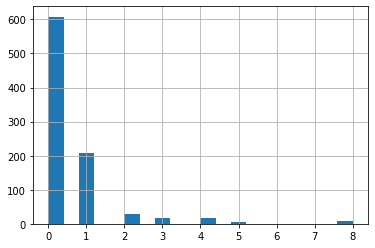

In [11]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals

data['SibSp'].hist(bins=20)

<AxesSubplot:>

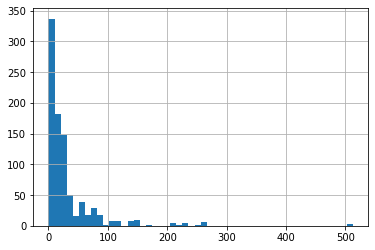

In [12]:
# histogram of continuous variable

data['Fare'].hist(bins=50)

Text(0.5, 1.0, 'embakred - port')

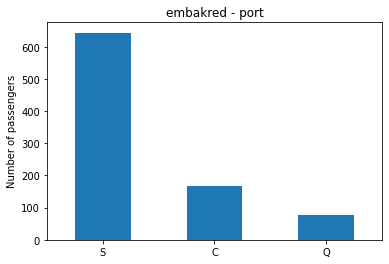

In [13]:
# bar plots for categorical variables

data['Embarked'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('embakred - port')

# Determining Cardinality

In [ ]:
# we will use the selected variables for the recipe
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']

# load the dataset
data = pd.read_csv('https://drive.google.com/file/d/1amFjEBHEnadGUFX9r0IgwF74klhPYh1l/view?usp=sharing', usecols=cols)



# the dataset contains empty strings
# which are in essence missing values
# I replace those here
data = data.replace(' ', np.nan)

# let's inspect the first 5 rows
data.head()

In [ ]:
# with the following command we can learn the cardinality
# of each of the loaded variables

data.nunique()

In [ ]:
# nunique() ignores missing data by default. If we want
# to consider missing values as an additional category
# we need to explicitly mention so, passing the argument
# dropna=False

data.nunique(dropna=False)

In [ ]:
# let's print the different unique labels
data['GENDER'].unique()

In [ ]:
# let's plot the cardinality of the variables 

data.nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [ ]:
# if we want to evaluate the cardinality of only a subset 
# of columns from a data set, we can do so by passing the
# columns of interest as follows:

# evaluate cardinality of variables of choice
data[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

# Pinpointing Rare Categories

In [16]:
# load the Car Evaluation Dataset

# this data does not include the columns, so we need
# to indicate so while loading by passing header=None

data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/car.data?token=GHSAT0AAAAAABQC3H37LVKOG4X43S7E36W4YRBWJJA', header=None)


# add the column names manually
# column descriptions are indicated in the UCI website
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
# let's find the cardinality of the variable
# the number of unique categories

data['class'].nunique()

4

In [18]:
# let's inspect the name of the categories

data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [19]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [20]:
# now let's calculate the frequency for each category

# code as in book:

label_freq = data['class'].value_counts() / len(data)

# let's inspect the frequency of the labels
label_freq

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

In [21]:
# same code a bit nicer

# now let's calculate the frequency for each category

# first we calculate the total number of cars in the dataset
total_cars = len(data)
print('Total number of cars {}'.format(total_cars))

# then we calculate label frequency
# value_counts() counts the number of cars per label
# by dividing by total cars we obtain the frequency

label_freq = data['class'].value_counts() / total_cars

# let's inspect the frequency of the labels
label_freq

Total number of cars 1728


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

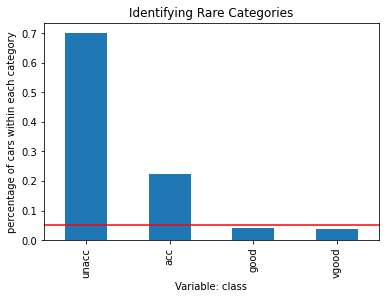

In [22]:
# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

# Identifying a Linear Relationship

In [23]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# linear assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Linear relationships can be assessed by scatter plots.

Text(0.5, 20.80000000000002, 'Independent variable')

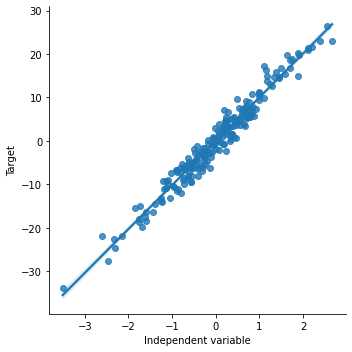

In [26]:
# for the simulated data

# this is how the scatter-plot looks like when
# there is a linear relationship between X and Y

sns.lmplot(x="x", y="y", data=data, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

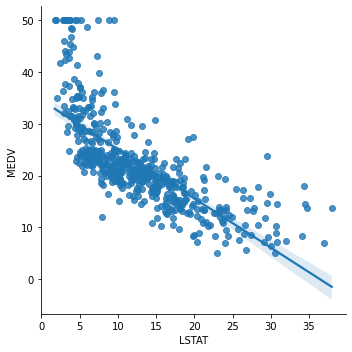

In [27]:
# now we make a scatter plot for the boston
# house price dataset

# we plot the variable LAST (% lower status of the population)
# vs the target MEDV (median value of the house)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

Although not perfect, the relationship is fairly linear.

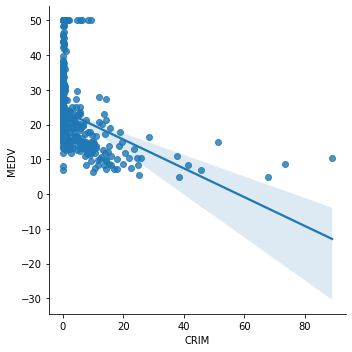

In [28]:
# now we plot CRIM (per capita crime rate by town)
# vs the target MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

Linear relationships can also be assessed by evaluating the residuals. Residuals are the difference between the value estimated by the linear relationship and the real output. If the relationship is linear, the residuals should be normally distributed and centered around zero.

Text(0, 0.5, 'Real value')

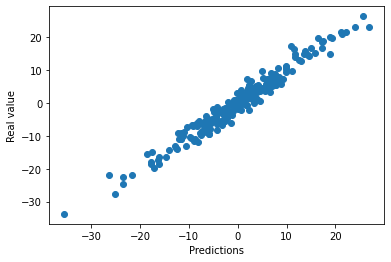

In [29]:
# SIMULATED DATA

# step 1: build a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(data['x'].to_frame(), data['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(data['x'].to_frame())

# step 3: calculate the residuals
error = data['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

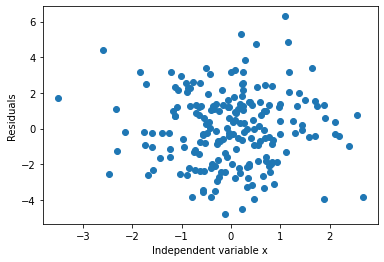

In [30]:
# step 4: observe the distribution of the residuals

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

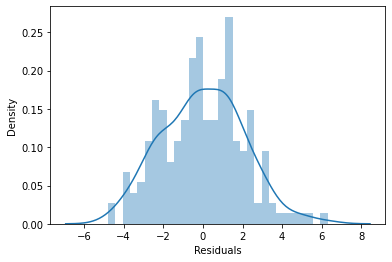

In [31]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

Text(0, 0.5, 'MEDV')

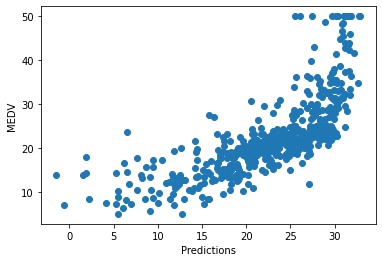

In [32]:
# now we do the same for the variable LSTAT of the boston
# house price dataset from sklearn

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

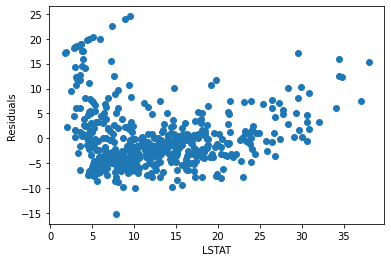

In [33]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

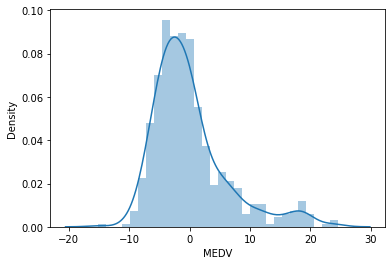

In [34]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

For this particular case, the residuals are centered around zero, but they are not homogeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.

# Identifying a Normal Distribution

In [35]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)


boston.head()

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
# I will create a dataframe with the variable x that
# follows a normal distribution 

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book, we pass 200 within brackets directly, without defining n
x = np.random.randn(n)

data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


Normality can be assessed by histograms:

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

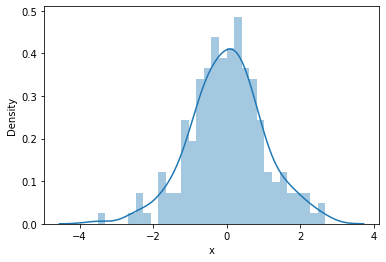

In [38]:
# histogram of the simulated independent variable x
# which we know follows a Gaussian distribution

sns.distplot(data['x'], bins=30)

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

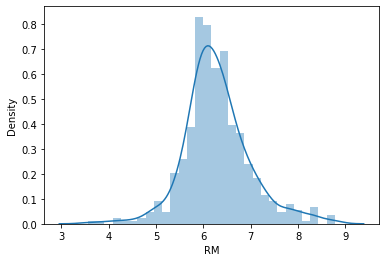

In [39]:
# histogram of the variable RM from the boston
# house price dataset from sklearn
# RM is the average number of rooms per dwelling

sns.distplot(boston['RM'], bins=30)

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

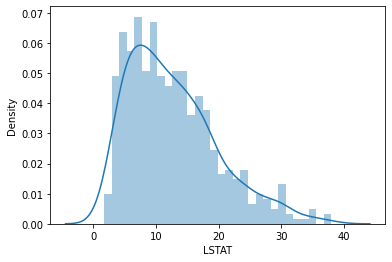

In [40]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.distplot(boston['LSTAT'], bins=30)

Normality can be also assessed by Q-Q plots. In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line as indicated below.  

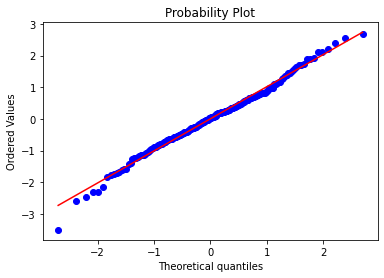

In [41]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

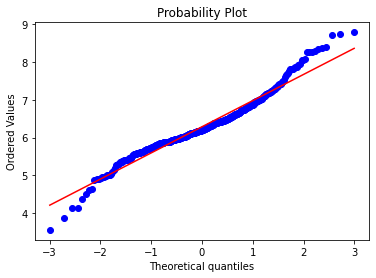

In [42]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

Most of the observations of RM fall on the 45 degree line, which suggests that the distribution is approximately Gaussian, with some deviation towards the larger and smaller values of the variable. 

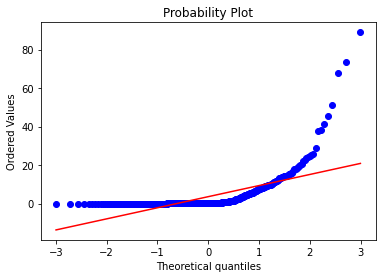

In [43]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

CRIM does not follow a Gaussian distribution as most of its observations deviate from the 45 degree line in the Q-Q plot.

# Distribution Variable Distribution

In [44]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

boston.head()

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

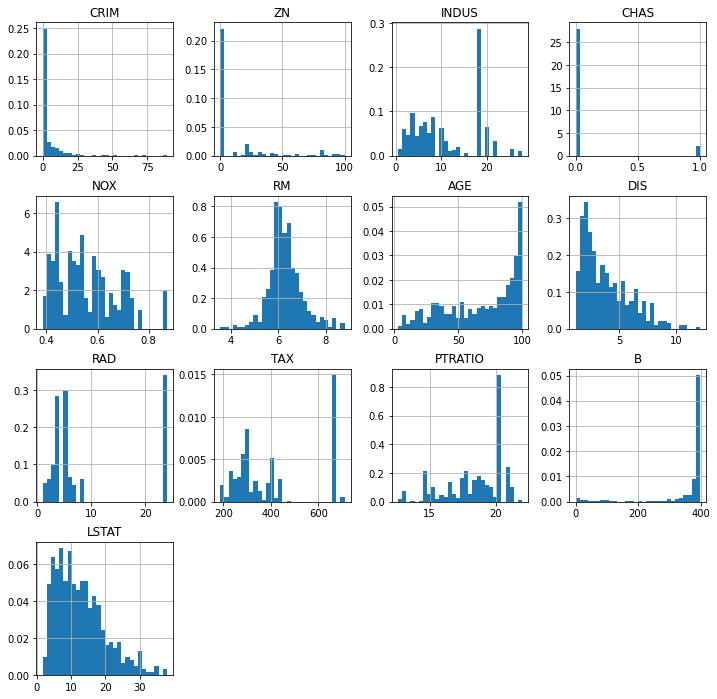

In [46]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

# Highlighting Outliers

In [47]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# indicated below: 
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In the boxplot displayed below, the IQR is indicated by the box, the median is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers  mark the proximity rule boundaries as described above. Values that fall outside the whiskers are considered outliers.

Text(0.5, 1.0, 'Boxplot')

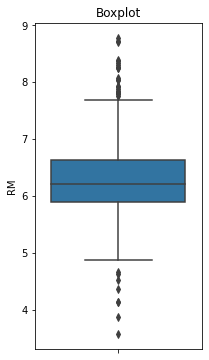

In [48]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

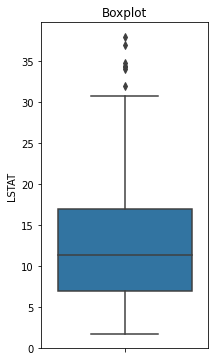

In [49]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['LSTAT'])
plt.title('Boxplot')

In [50]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# function as presented in the book

def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [51]:
# we find the boudaries for the variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [52]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# alternative, also presented in the book
# passing the distance as a function argument
# to allow for versatility

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [53]:
# we find the boudaries for the variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [54]:
# let's flag the outliers in the data set

outliers = np.where(boston['RM'] > upper_boundary, True,
                    np.where(boston['RM'] < lower_boundary, True, False))

In [55]:
# how many outliers did we find?
outliers.sum()

30

In [56]:
# let's print a few of them

outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [57]:
tmp = boston.loc[~outliers, 'RM']
tmp.shape

(476,)

# Comparing Feature Magnitude

In [58]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

data.head()

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
# let's have a look at the values of those variables
# to get an idea of the feature magnitudes

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In the table we observe the main statistics of the variables, e.g., the 25th, 50th and 75th quantiles, the mean, standard deviation and minimum and maximum value. Comparing these parameters we can quickly understand whether our features are in a similar scale. In this case, they are clearly not.

CRIM takes values 0-89 whereas CHAS takes values 0 to 1, and RM takes values 3.5 to 8.8.

In [60]:
# let's now calculate the range of the variables

data.max() - data.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64

The ranges of the variables, as expected are quite different.